<a href="https://colab.research.google.com/github/EmmaFodor/Phyton/blob/main/Lab_recapitulativ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laborator recapitulativ Machine Learning**

Salvati acest notebook in drive, iar dupa rezolvare incarcati linkul de sharing in assignementul de pe moodle aferent laboratorului.

***Cerinte***


1.   Descarcati un set de date pentru clasificare de pe platforma [kaggle.com ](https://kaggle.com ). [Exemplu de cautare: https://www.kaggle.com/datasets?search=classification ]
2.   Puteti utiliza Numpy sau/si Pandas pentru a incarca setul de date.
3. Realizati vizualizari ale variabilelor din setul de date pentru a observa distributia (folositi matplotlib).
4. Impartiti setul de date in training (70%) si validare (30%).
4. Adaugati 3 algoritmi diferiti de clasificare pe care sa ii rulati pe setul de training si sa verificati performanta pe setul de validare. Utilizati ***accuracy*** ca si masura a performantei.
5. Afisati automat cea mai buna performanta si numele algoritmului castigator.

Utilizati template-ul de mai jos pentru a introduce codul aferent.






Import bibillioteci:

In [ ]:
#Introduceti aici codul pentru importul tuturor bibliotecilor folosite
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Arbore de decizie
from sklearn.model_selection import train_test_split # Import functie partitionare date
from sklearn import metrics #Import biblioteca pentru masurarea acuratetii
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
!pip install ipympl

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

import seaborn as sns 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/gdrive/')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive/


Incarcare date:

In [ ]:
#Introuceti aici codul pentru incarcarea setului de date
#col_names = ['baterry_power', 'blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','pc_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi','price_range']
train_data=pd.read_csv('train.csv')
train = train_data.copy()

Vizualizari:

In [ ]:
#Introduceti aici codul pentru realizarea vizualizarilor
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#Definirea variabilei tinta
y=train.price_range
X=train.drop(columns='price_range')
print(X,y)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

Partitionare date:

In [ ]:
#Introduceti aici codul pentru partitionarea datelor 70% training-30% validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training  30% test

Algoritm 1 (Regresie logistica):

In [ ]:
#Introduceti aici codul pentru clasificare folosind regresie logistica
#w_in = np.zeros((1)) #widget regresie liniara
#train.price_range.value_counts().plot(kind='bar')

model=LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algoritm 2 (Arbori de decizie):

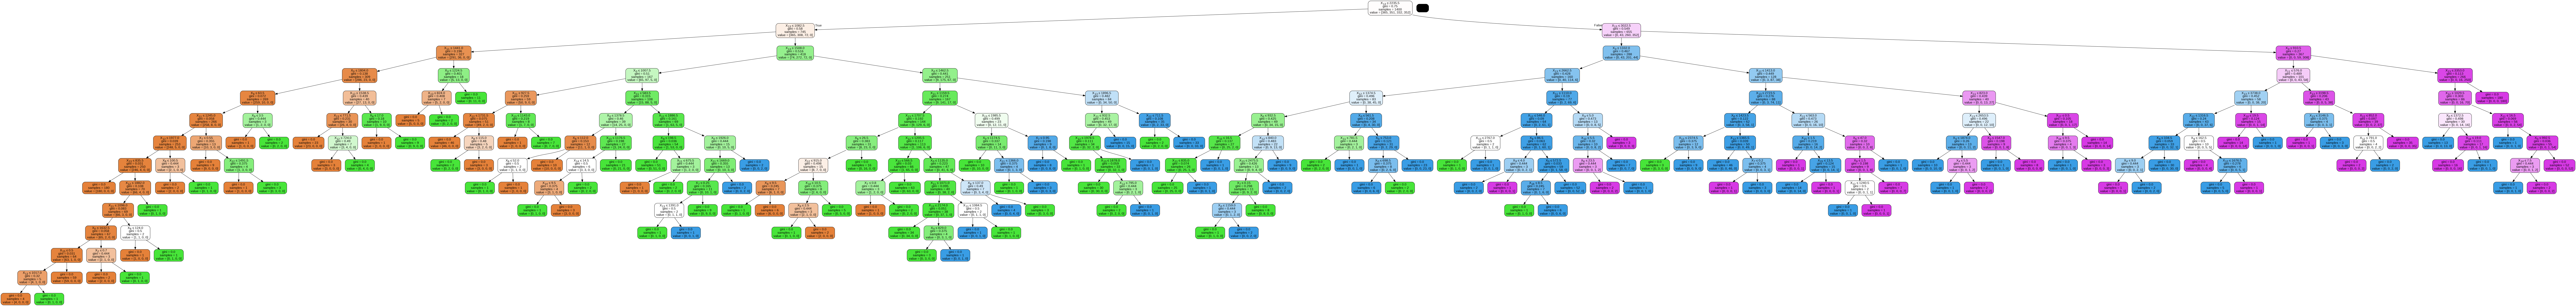

In [ ]:
#Introduceti aici codul pentru clasificare folosind un arbore de decizie
#definire model
clf = DecisionTreeClassifier()

#Antrenament
clf = clf.fit(X_train,y_train)

#Predictie
y_pred = clf.predict(X_test)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mobile.png')
Image(graph.create_png())


Algoritm 3 (Retele neuronale):

In [ ]:
#Introduceti aici codul pentru clasificare folosind o retea neuronala
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array(X_test, dtype=float)
ys = np.array(y_train, dtype=float)

model.fit(xs, ys, epochs=200)

ValueError: ignored

Comparati performantele celor 3 algoritmi:

In [ ]:
##Introduceti aici codul pentru afisarea algoritmului cu performanta cea mai ridicata si a valorii accuracy
print("Accuracy arbore de decizie:",metrics.accuracy_score(y_test, y_pred)) 
print("Accuracy regression: "+str(metrics.accuracy_score(y_test_pred,y_test)))

Accuracy arbore de decizie: 0.8516666666666667
Accuracy regression: 0.6283333333333333


---
***Nu uitati sa incarcati linkul in assignementul laboratorului pe moodle***